# **Importing Libaries**

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, warnings, scipy 
warnings.filterwarnings('ignore')

# Plotting Tools
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots

# **Dataset**

In [2]:
df = pd.read_csv("climate_dataset.csv")
dfs = pd.read_csv("climate_dataset.csv")
df.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


# **Exploratory Data Analysis (EDA)**

### **Feature analysis**

### **checking columns of dataset**






In [3]:
df.columns

Index(['Unnamed: 0', 'Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission'],
      dtype='object')

### **checking data types of columns**


In [4]:
df.dtypes

Unnamed: 0                       int64
Country                         object
Energy_type                     object
Year                             int64
Energy_consumption             float64
Energy_production              float64
GDP                            float64
Population                     float64
Energy_intensity_per_capita    float64
Energy_intensity_by_GDP        float64
CO2_emission                   float64
dtype: object

### **checking null values of columns**

In [5]:
df.isnull().sum()

Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

# **Droping Null values from specific columns**

In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df = df.dropna(subset = ['GDP','Energy_intensity_by_GDP','CO2_emission'])

In [8]:
df.isnull().sum()

Country                           0
Energy_type                       0
Year                              0
Energy_consumption             5372
Energy_production              5372
GDP                               0
Population                        0
Energy_intensity_per_capita       0
Energy_intensity_by_GDP           0
CO2_emission                      0
dtype: int64



### **sum of total values in Energy_type**


In [9]:
df.Energy_type.value_counts()

nuclear                      6503
renewables_n_other           6503
all_energy_types             6426
coal                         6426
natural_gas                  6410
petroleum_n_other_liquids    6409
Name: Energy_type, dtype: int64

### **checking total rows and columns of dataset**

In [10]:
df.shape

(38677, 10)

### **checking information related to columns**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38677 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      38677 non-null  object 
 1   Energy_type                  38677 non-null  object 
 2   Year                         38677 non-null  int64  
 3   Energy_consumption           33305 non-null  float64
 4   Energy_production            33305 non-null  float64
 5   GDP                          38677 non-null  float64
 6   Population                   38677 non-null  float64
 7   Energy_intensity_per_capita  38677 non-null  float64
 8   Energy_intensity_by_GDP      38677 non-null  float64
 9   CO2_emission                 38677 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.2+ MB


### **describing columns**


In [12]:
df.describe()

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,38677.000000,33305.000000,3.330500e+04,38677.000000,3.867700e+04,38677.000000,38677.000000,38677.000000
mean,2002.799493,1.960963,1.940987e+00,853.120783,7.292383e+04,84.876638,4.729739,101.059404
std,10.021928,17.753187,1.755388e+01,6083.208032,4.967378e+05,118.432175,4.367893,1038.208999
min,1980.000000,-0.163438,-1.000000e-39,0.124958,1.615500e+01,0.000000,0.000000,-0.005130
25%,1995.000000,0.001196,0.000000e+00,10.697000,1.951640e+03,9.966806,2.378265,0.000000
50%,2003.000000,0.040328,4.748380e-03,51.885000,7.389058e+03,42.479219,3.762596,0.075282
75%,2011.000000,0.353622,1.972639e-01,273.748800,2.333000e+04,111.422898,5.754108,8.721402
max,2019.000000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


### **checking correlation of columns**

In [13]:
df.corr()

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
Year,1.000000,0.000618,0.001473,0.024898,-0.012521,0.015079,-0.108202,0.001006
Energy_consumption,0.000618,1.000000,0.993731,0.705055,0.696232,0.034615,0.051365,0.982769
Energy_production,0.001473,0.993731,1.000000,0.700910,0.696547,0.039944,0.055874,0.975663
GDP,0.024898,0.705055,0.700910,1.000000,0.945598,0.036993,0.039028,0.673877
Population,-0.012521,0.696232,0.696547,0.945598,1.000000,-0.018996,0.055904,0.667240
Energy_intensity_per_capita,0.015079,0.034615,0.039944,0.036993,-0.018996,1.000000,0.344200,0.028711
Energy_intensity_by_GDP,-0.108202,0.051365,0.055874,0.039028,0.055904,0.344200,1.000000,0.047406
CO2_emission,0.001006,0.982769,0.975663,0.673877,0.667240,0.028711,0.047406,1.000000


# **Data Visualiztion**

# **Type of Energy used in past  1980's to 2020 years**

In [14]:
Energy_type=df.Energy_type.value_counts().sort_values(ascending=False)[:10]
print(Energy_type)

nuclear                      6503
renewables_n_other           6503
all_energy_types             6426
coal                         6426
natural_gas                  6410
petroleum_n_other_liquids    6409
Name: Energy_type, dtype: int64


# **Histogram to better visualize**

[Text(0, 0.5, '\nTotal Counts')]

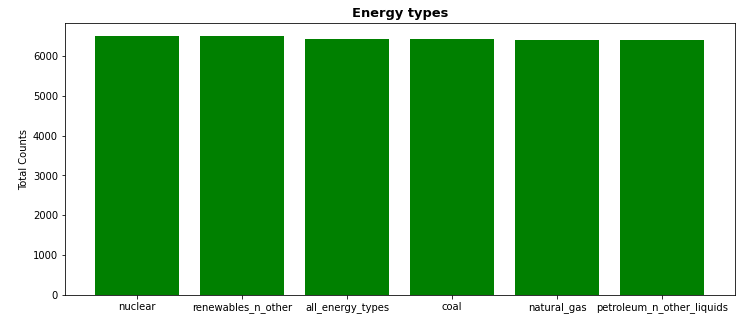

In [15]:
Energy_type=df['Energy_type'].value_counts().sort_values(ascending=False)
# prepare plot
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(Energy_type.index, Energy_type.values, color='green')
ax.set_title('Energy types', fontsize=13, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

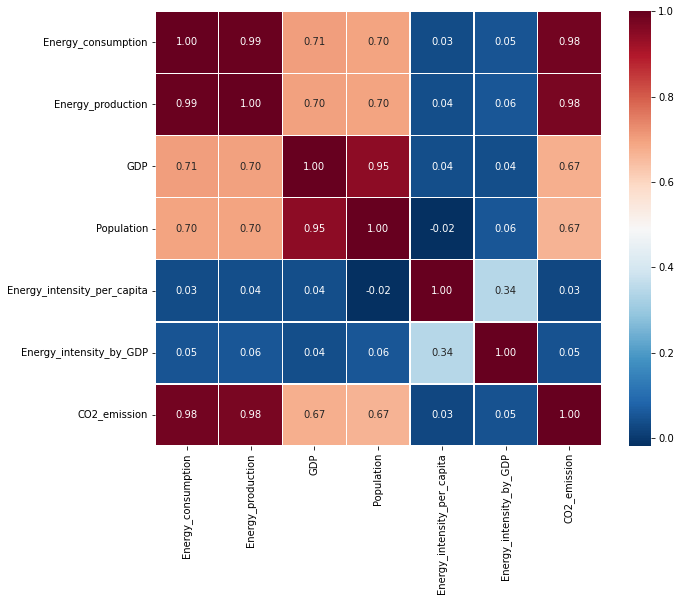

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.iloc[:,3:].corr(), annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdBu_r")
plt.show()

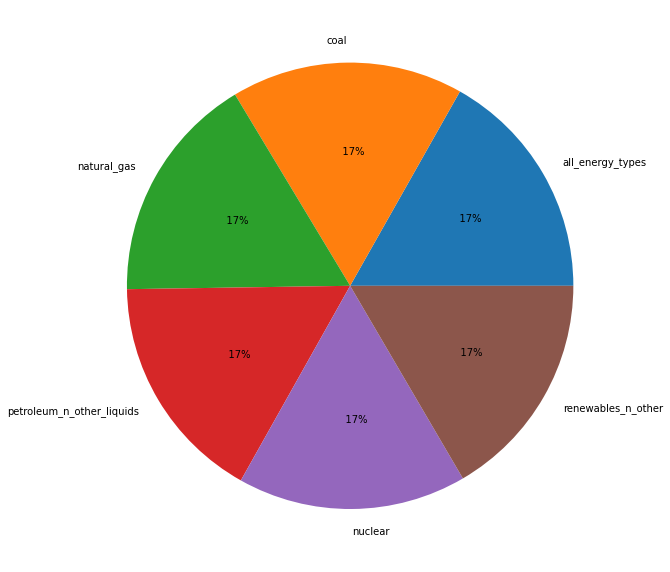

In [17]:
axis = plt.subplots(figsize=(10,14))
Name = df["Energy_type"].unique()
size = df["Energy_type"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

# **Most CO2 emission caused by renewables and coal,natural gas and petroleum liquids.**

In [18]:
CO2_emission_by_energy = df.groupby('Energy_type').count()['CO2_emission'].reset_index().sort_values(by='CO2_emission',ascending=False)
CO2_emission_by_energy.style.background_gradient(cmap='coolwarm')

,Energy_type,CO2_emission
3,nuclear,6503
5,renewables_n_other,6503
0,all_energy_types,6426
1,coal,6426
2,natural_gas,6410
4,petroleum_n_other_liquids,6409


# **GDP of countries b/w 1980 to 1990**

In [19]:
GDP = df[df['Year']<=1990]
GDP.groupby('Year')['Country', 'Energy_type', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission'].count()

,Country,Energy_type,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
Year,,,,,,,
1980,108,108,108,108,108,108,108
1981,306,306,306,306,306,306,306
1982,306,306,306,306,306,306,306
1983,306,306,306,306,306,306,306
1984,306,306,306,306,306,306,306
1985,306,306,306,306,306,306,306
1986,306,306,306,306,306,306,306
1987,306,306,306,306,306,306,306
1988,948,948,948,948,948,948,948


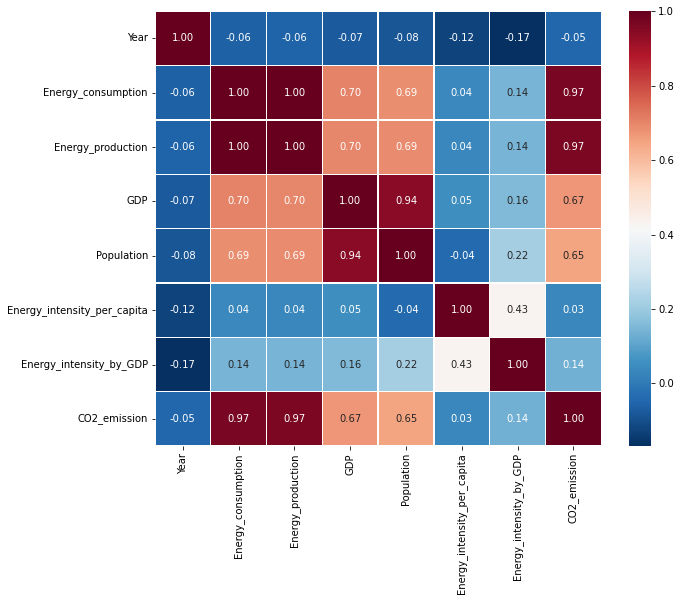

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data=GDP.corr(), annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdBu_r")
plt.show()

# **Average CO2_emission increase fastly from 1980 to 2020. Specailly last 10 years CO2 emission rapidly increases.**
# **Average CO2_emission increase fastly from 1980 to 2020 by population. As population increased CO2 emission rapidly increases.**





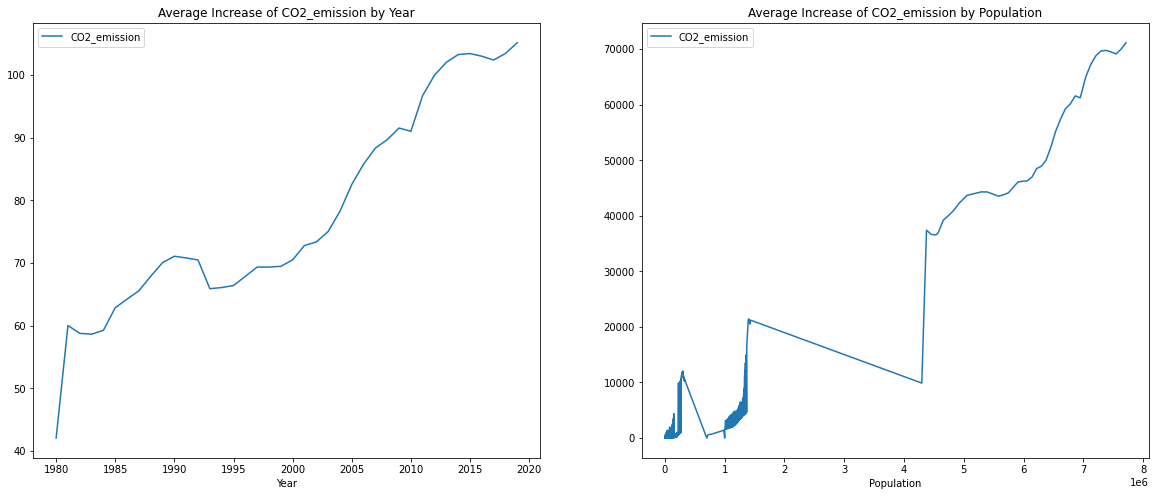

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,8))
dfs[['Year','CO2_emission']].groupby(['Year']).mean().plot(ax=ax[0])
ax[0].set_title('Average Increase of CO2_emission by Year')
dfs[['Population','CO2_emission']].groupby(['Population']).sum().plot(ax=ax[1])
ax[1].set_title('Average Increase of CO2_emission by Population')
plt.show()


# **Analysis Top 10 countries according to GDP, Population, Energy production, CO2_emission. After seeing matrix china, india, USA are top 3 countries to produce CO2 and Population**

In [22]:
top_country = df[df['Year'] == max(df['Year'])].reset_index()
full_latest_top_country = top_country.groupby('Country')['GDP', 'Population', 'Energy_production', 'CO2_emission'].sum().reset_index()
temp_f = full_latest_top_country.sort_values(by='Population', ascending=False)[:11]
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

,Country,GDP,Population,Energy_production,CO2_emission
0,World,766141.482354,46287786.382980,1223.017937,71169.866995
1,China,138770.040000,8607072.000000,247.182719,21217.200773
2,India,55861.740000,8208840.000000,35.570744,4616.664040
3,United States,119552.580000,1980262.800000,202.801836,10554.385508
4,Indonesia,19366.002000,1625904.000000,34.118303,1058.809346
5,Pakistan,6239.280000,1299384.000000,3.855328,385.793988
6,Brazil,18247.794000,1267477.200000,25.426486,906.886544
7,Nigeria,6095.334000,1206304.800000,12.048611,202.387851
8,Bangladesh,4788.678000,978126.000000,2.218214,181.563262
9,Russia,22622.520000,875257.800000,128.555991,3596.484477


# **Analysis Last 20 year according to GDP, Population, Energy production, CO2_emission. After seeing matrix last 3 years 2019,2018,2017 are worst year as CO2 and Population increase as compared to pervious years**

In [23]:
top_country = dfs[dfs['Year'] == (dfs['Year'])].reset_index()
full_latest_top_country = top_country.groupby('Year')['GDP', 'Population', 'Energy_production', 'CO2_emission'].sum().reset_index()
temp_f = full_latest_top_country.sort_values(by='Population', ascending=False)[:21]
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

,Year,GDP,Population,Energy_production,CO2_emission
0,2019,1532282.964708,92575572.765960,2446.035875,142339.733991
1,2018,1489943.928420,91586964.138600,2402.914918,140011.603109
2,2017,1438251.860484,90580125.472440,2312.981018,138289.522816
3,2016,1386814.561260,89568514.154760,2258.321104,139006.422372
4,2015,1343230.748856,88550727.840360,2274.233168,139577.040210
5,2014,1300850.158296,87567239.772000,2253.324967,139359.616997
6,2013,1258313.386392,86541866.508000,2216.710212,137693.658992
7,2012,1218409.350936,85515147.528240,2185.334422,134533.297949
8,2011,1180224.384600,84441568.068000,2136.751490,130077.221498
9,2010,1135410.317220,83385720.168000,2074.926630,122487.308935


# **India GDP in last 40 years vs India Population in last 40 year**

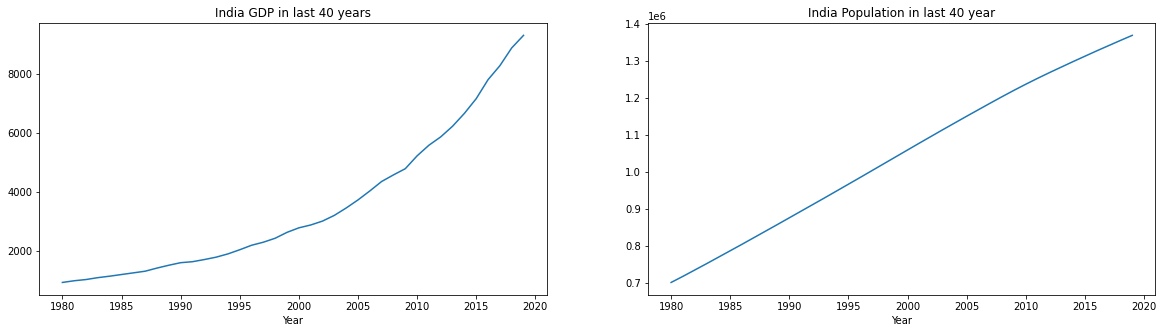

In [24]:
# Before Adjustment
ax = plt.subplot(1, 2, 1)
dfs[dfs['Country'] == 'India'].plot(x='Year', y='GDP', legend=None, ax=ax, figsize=(20, 5), title='India GDP in last 40 years');

ax = plt.subplot(1, 2, 2)
dfs[dfs['Country'] == 'India'].plot(x='Year', y='Population', legend=None, ax=ax, figsize=(20, 5), title='India Population in last 40 year');

In [29]:
dfs['Country'].value_counts()

World                   240
Netherlands Antilles    240
New Zealand             240
Nicaragua               240
Niger                   240
                       ... 
Germany, West           240
Ghana                   240
Gibraltar               240
Greece                  240
Zimbabwe                240
Name: Country, Length: 231, dtype: int64

# **United Kingdom GDP in last 40 years vs United Kingdom Population in last 40 year**

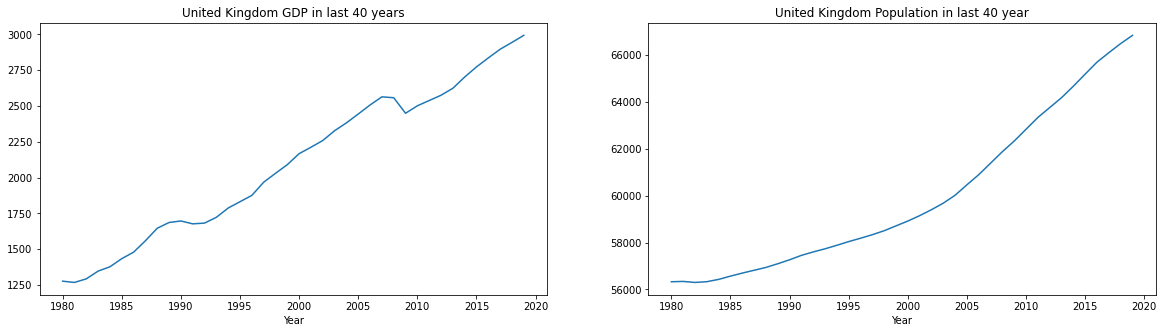

In [31]:
# Before Adjustment
ax = plt.subplot(1, 2, 1)
dfs[dfs['Country'] == 'United Kingdom'].plot(x='Year', y='GDP', legend=None, ax=ax, figsize=(20, 5), title='United Kingdom GDP in last 40 years');

ax = plt.subplot(1, 2, 2)
dfs[dfs['Country'] == 'United Kingdom'].plot(x='Year', y='Population', legend=None, ax=ax, figsize=(20, 5), title='United Kingdom Population in last 40 year');

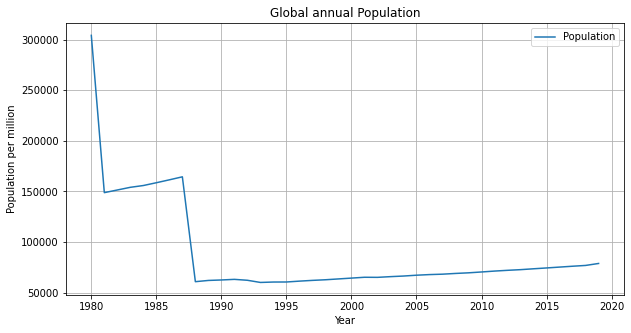

In [26]:
plt.figure()
annual_co2_ppm = df.groupby(df["Year"]).mean()
annual_co2_ppm.loc[1960:2020]["Population"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Global annual Population")
plt.ylabel("Population per million")
plt.show()

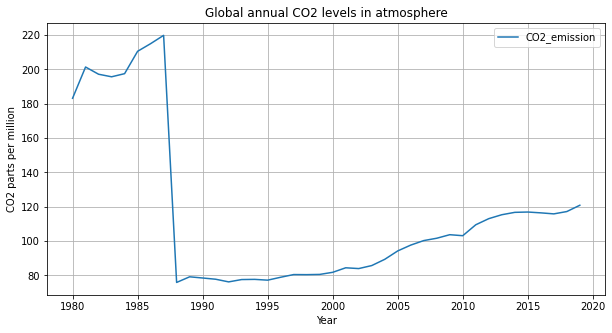

In [27]:
plt.figure()
annual_co2_ppm = df.groupby(df["Year"]).mean()
annual_co2_ppm.loc[1960:2020]["CO2_emission"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Global annual CO2 levels in atmosphere")
plt.ylabel("CO2 parts per million")
plt.show()

# **Conclusion:**

1. Most CO2 emission caused by renewables and coal,natural gas and petroleum liquids.
2. Average CO2_emission increase fastly from 1980 to 2020. Specailly last 10 years CO2 emission rapidly increases.
3. Average CO2_emission increase fastly from 1980 to 2020 by population. As population increased CO2 emission rapidly increases.
4. Analysis Top 10 countries according to GDP, Population, Energy production, CO2_emission. After seeing matrix china, india, USA are top 3 countries to produce CO2 and Population
5. Analysis Last 20 year according to GDP, Population, Energy production, CO2_emission. After seeing matrix last 3 years 2019,2018,2017 are worst year as CO2 and Population increase as compared to pervious years

